#DATA@BeniderYassine
**Exos pour stage Data scientist chez Tictactrip**

##**1. Let's explore the data**

In [1]:
#importing the libraries
import pandas as pd
from datetime import timedelta
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

!pip install pyproj==1.9.6
from pyproj import Geod

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

import folium
from folium import plugins
from math import sin, cos, sqrt, atan2, radians

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/bin/bash: conda: command not found


Je commence par explorer les fichiers csv et leur infos.
Il faut noter qu'on remarque des valeurs NaN, soit affiché soit dans le Non-Null count de .info()

In [2]:
# Load the CSV data into DataFrames and show info
city = pd.read_csv('cities.csv', index_col=['id'])
print(city.info())
print(city.isna().any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8040 entries, 5159 to 11537
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   local_name   8040 non-null   object 
 1   unique_name  8039 non-null   object 
 2   latitude     8040 non-null   float64
 3   longitude    8040 non-null   float64
 4   population   369 non-null    float64
dtypes: float64(3), object(2)
memory usage: 376.9+ KB
None
local_name     False
unique_name     True
latitude       False
longitude      False
population      True
dtype: bool


In [3]:
# Load the CSV data into DataFrames and show info
provider = pd.read_csv('providers.csv', index_col=['id'])
print(provider.info())
print(provider.isna().any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 9 to 8389
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   company_id            227 non-null    int64 
 1   provider_id           213 non-null    object
 2   name                  227 non-null    object
 3   fullname              227 non-null    object
 4   has_wifi              224 non-null    object
 5   has_plug              224 non-null    object
 6   has_adjustable_seats  224 non-null    object
 7   has_bicycle           224 non-null    object
 8   transport_type        227 non-null    object
dtypes: int64(1), object(8)
memory usage: 17.7+ KB
None
company_id              False
provider_id              True
name                    False
fullname                False
has_wifi                 True
has_plug                 True
has_adjustable_seats     True
has_bicycle              True
transport_type          False
dtype: bool


In [4]:
# Load the CSV data into DataFrames and show info
station = pd.read_csv('stations.csv', index_col=['id'])
print(station.info())
print(station.isna().any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11035 entries, 1 to 11036
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unique_name  11035 non-null  object 
 1   latitude     11035 non-null  float64
 2   longitude    11035 non-null  float64
dtypes: float64(2), object(1)
memory usage: 344.8+ KB
None
unique_name    False
latitude       False
longitude      False
dtype: bool


In [5]:
# Load the CSV data into DataFrames and show info 
ticket = pd.read_csv('ticket_data.csv', index_col=['id'])
print(ticket.info())
print(ticket.isna().any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74168 entries, 6795025 to 6869191
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          74168 non-null  int64  
 1   o_station        32727 non-null  float64
 2   d_station        32727 non-null  float64
 3   departure_ts     74168 non-null  object 
 4   arrival_ts       74168 non-null  object 
 5   price_in_cents   74168 non-null  int64  
 6   search_ts        74168 non-null  object 
 7   middle_stations  32727 non-null  object 
 8   other_companies  32727 non-null  object 
 9   o_city           74168 non-null  int64  
 10  d_city           74168 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 6.8+ MB
None
company            False
o_station           True
d_station           True
departure_ts       False
arrival_ts         False
price_in_cents     False
search_ts          False
middle_stations     True
other_companies   

In [6]:
#display first 5 rows of Datasets
display(city.head())
display(station.head())
display(provider.head())
display(ticket.head())

,local_name,unique_name,latitude,longitude,population
id,,,,,
5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


,unique_name,latitude,longitude
id,,,
1,Aalen (Stuttgarter Straße),48.835296,10.092956
2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
3,Aéroport CDG,49.009900,2.559310
4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
5,Aéroport de Dresden,51.123604,13.764737


,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
id,,,,,,,,,
9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
11,3,NaN,infobus,Infobus,False,False,False,False,bus
12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
id,,,,,,,,,,,
6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


##2. **Data Preprocessing**

In [7]:
#je transforme les colonnes 'departure_ts', 'arrival_ts' et 'search_ts' en datetime object pour faciliter la suite de l'analyse
ticket.departure_ts = pd.to_datetime(ticket.departure_ts)
ticket.arrival_ts = pd.to_datetime(ticket.arrival_ts)
ticket.search_ts = pd.to_datetime(ticket.search_ts)

ticket.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 74168 entries, 6795025 to 6869191
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   company          74168 non-null  int64              
 1   o_station        32727 non-null  float64            
 2   d_station        32727 non-null  float64            
 3   departure_ts     74168 non-null  datetime64[ns, UTC]
 4   arrival_ts       74168 non-null  datetime64[ns, UTC]
 5   price_in_cents   74168 non-null  int64              
 6   search_ts        74168 non-null  datetime64[ns, UTC]
 7   middle_stations  32727 non-null  object             
 8   other_companies  32727 non-null  object             
 9   o_city           74168 non-null  int64              
 10  d_city           74168 non-null  int64              
dtypes: datetime64[ns, UTC](3), float64(2), int64(4), object(2)
memory usage: 6.8+ MB


In [0]:
#Création d'une nouvelle colonne : durée sur ticket

ticket['duree'] = ticket.arrival_ts - ticket.departure_ts

J'elimine certaines colonnes que je n'utiliserai pas dans ce préliminaire

In [0]:
provider.drop(['has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle'], axis=1, inplace= True) #garder ces infos pourrait quand même etre utile pour savoir qu'est-ce qui attire les pasagers avec du machine learning ...

In [10]:
#get transport type for each ticket
merged = pd.merge(ticket, provider, how= 'inner', left_on='company', right_on='id')
merged.head()

,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duree,company_id,provider_id,name,fullname,transport_type
0,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,611,542,06:10:00,11,NaN,bbc,Blablacar,carpooling
1,8385,NaN,NaN,2017-10-06 05:30:00+00:00,2017-10-06 08:30:00+00:00,1800,2017-10-01 01:03:18.948000+00:00,NaN,NaN,628,453,03:00:00,11,NaN,bbc,Blablacar,carpooling
2,8385,NaN,NaN,2017-10-06 07:00:42+00:00,2017-10-06 09:30:42+00:00,2150,2017-10-01 01:03:18.948000+00:00,NaN,NaN,628,453,02:30:00,11,NaN,bbc,Blablacar,carpooling
3,8385,NaN,NaN,2017-10-06 07:10:00+00:00,2017-10-06 09:40:00+00:00,1700,2017-10-01 01:03:18.948000+00:00,NaN,NaN,628,453,02:30:00,11,NaN,bbc,Blablacar,carpooling
4,8385,NaN,NaN,2017-10-06 10:00:00+00:00,2017-10-06 12:50:00+00:00,1700,2017-10-01 01:03:18.948000+00:00,NaN,NaN,628,453,02:50:00,11,NaN,bbc,Blablacar,carpooling


création d'un table merged_d pour avoir les coordonées de depart et d'arriver afin de calculer la distance & plot (voir la dernière partie)

In [11]:
merged_o= pd.merge(ticket, city, how= 'inner', left_on='o_city', right_on='id')
merged_o.drop(['o_city', 'population', 'o_station', 'd_station'], axis=1, inplace=True)
merged_o.columns = ['company', 'departure_ts', 'arrival_ts', 'price_in_cents', 'search_ts', 'middle_stations', 'other_companies', 'd_city', 'duree', 'o_local_name', 'o_city', 'o_latitude','o_longitude']

merged_d= pd.merge(merged_o, city, how= 'inner', left_on='d_city', right_on='id')
merged_d.drop(['d_city', 'population'], axis=1, inplace=True)
merged_d.columns = ['company', 'departure_ts', 'arrival_ts', 'price_in_cents', 'search_ts', 'middle_stations', 'other_companies', 'duree', 'o_local_name', 'o_city', 'o_latitude','o_longitude', 'd_local_name', 'd_city', 'd_latitude','d_longitude']



merged_d.head()

,company,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,duree,o_local_name,o_city,o_latitude,o_longitude,d_local_name,d_city,d_latitude,d_longitude
0,8385,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,0 days 06:10:00,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318
1,9,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},0 days 17:50:00,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318
2,8377,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",1 days 07:57:00,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318
3,8377,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",0 days 21:35:00,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318
4,8381,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},0 days 21:46:00,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318


In [0]:
wgs84_geod = Geod(ellps='WGS84') #Mesure de la distance sur l'ellipsoid - plus precise que la methode spherique

#Get distance between pairs of lat-lon points
def Distance(lat1,lon1,lat2,lon2):
  az12,az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2) #Yes, this order is correct
  return dist

In [0]:
#Création d'une nouvelle colonne : distance sur city (o_city et d_city sont tous non nul contrairement à o_station et d_station)
merged_d['distance'] = Distance(merged_d['o_latitude'].tolist(),merged_d['o_longitude'].tolist(),merged_d['d_latitude'].tolist(),merged_d['d_longitude'].tolist())

#to km
merged_d['distance'] = merged_d['distance'] /1000

In [15]:
merged_d.head()

,company,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,duree,o_local_name,o_city,o_latitude,o_longitude,d_local_name,d_city,d_latitude,d_longitude,distance
0,8385,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,0 days 06:10:00,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,503.136831
1,9,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},0 days 17:50:00,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,503.136831
2,8377,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",1 days 07:57:00,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,503.136831
3,8377,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",0 days 21:35:00,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,503.136831
4,8381,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},0 days 21:46:00,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,503.136831


##3.**Reponse mission**

##Mission 1

In [16]:
ticket[['price_in_cents', 'duree']].describe(include='all')

,price_in_cents,duree
count,74168.000000,74168
mean,4382.711061,0 days 07:04:37.247600
std,3739.325367,0 days 09:54:58.881351
min,300.000000,0 days 00:20:00
25%,1900.000000,0 days 03:00:00
50%,3350.000000,0 days 04:50:00
75%,5250.000000,0 days 08:00:00
max,38550.000000,20 days 12:51:00


In [17]:
#réponse à la première mission
prix_min = ticket['price_in_cents'].min()
prix_max = ticket['price_in_cents'].max()
prix_moy = ticket['price_in_cents'].mean()

duree_min = ticket['duree'].describe(include='all')[3]
duree_max = ticket['duree'].describe(include='all')[-1]
duree_moy = ticket['duree'].describe(include='all')[1]

print('le prix min est:', prix_min, '\n')
print('le prix moyen est', prix_moy, '\n')
print('le prix max est', prix_max, '\n------------')
print('le durée min est:', duree_min, '\n')
print('le durée moyen est', duree_moy, '\n')
print('le durée max est:', duree_max, '\n')


le prix min est: 300 

le prix moyen est 4382.711061374178 

le prix max est 38550 
------------
le durée min est: 0 days 00:20:00 

le durée moyen est 0 days 07:04:37.247600 

le durée max est: 20 days 12:51:00 



On remarque une durée max de 20 jours, c'est trop! donc on va chercher la raison derrière ce resultat

In [18]:
#combien de trajet avec plus de 3 jours?
index1= ticket[ticket['duree'] > timedelta(days=3)].index
len(index1)

55

Il exite 55 trajets de +3 jours ! prenons l'exmple du trajet avec une durée de 20jours et cherchons l'origine, la destination et le type du moyen de transport

In [19]:
#on utlisie loc pour trouver l'id (car c'est un type object)
index2= ticket[ticket['duree'] == ticket.duree.max()].index
ticket.loc[index2]


,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duree
id,,,,,,,,,,,,
6800200,8372,860.0,396.0,2017-10-27 23:59:00+00:00,2017-11-17 12:50:00+00:00,3200,2017-10-02 20:39:10.750000+00:00,"{10760,10144}",{9},126,453,20 days 12:51:00


In [20]:
print('la societe est', provider['fullname'].loc[int(ticket.loc[index2].company)])

print('la ville de depart est', city['unique_name'].loc[int(ticket.loc[index2].o_city)])
print('la station de depart est', station['unique_name'].loc[int(ticket.loc[index2].o_station)])

print('la ville d\'arivée est', city['unique_name'].loc[int(ticket.loc[index2].d_city)])
print('la station d\'arivée est', station['unique_name'].loc[int(ticket.loc[index2].d_station)])

la societe est Eurolines
la ville de depart est bordeaux
la station de depart est Parking Château Descas
la ville d'arivée est lille
la station d'arivée est Gare Lille-Europe


Le trajet parrait normal ... la raison de la longeur du temps est à creuser encore plus!

In [21]:
#(merged_d['o_city'] == 'bordeaux') & (merged_d['d_city'] == 'lille') & (merged_d['company'] == 8372)
merged_d[merged_d['duree'] == merged_d['duree'].max()]

,company,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,duree,o_local_name,o_city,o_latitude,o_longitude,d_local_name,d_city,d_latitude,d_longitude,distance
35423,8372,2017-10-27 23:59:00+00:00,2017-11-17 12:50:00+00:00,3200,2017-10-02 20:39:10.750000+00:00,"{10760,10144}",{9},20 days 12:51:00,"Bordeaux, Nouvelle-Aquitaine, France",bordeaux,44.83357,-0.573845,"Lille, Hauts-de-France, France",lille,50.638756,3.076675,700.902848


In [41]:
#cross validation entre nom des villes et leur coordonées
address_o = 'Bordeaux, France'
address_d = 'Lille, France'

geolocator = Nominatim(user_agent="tictactrip_explore")

location_o = geolocator.geocode(address_o)
location_d = geolocator.geocode(address_d)

latitude_o = location_o.latitude
longitude_o = location_o.longitude
latitude_d = location_d.latitude
longitude_d = location_d.longitude

#je n'utilise le ' == ' pour retourner un booléen car y'as une petit marge d'erreur
print(latitude_o, longitude_o)
print(latitude_d, longitude_d)

44.841225 -0.5800364
50.6365654 3.0635282


Tout semble encore une fois correcte : la distance, les coordonées, ... c'est donc soit une faute d'enregistrement, soit les voyageurs etait en escale sur tout le long du trajet.


##Mission 2

différence de prix moyen et durée selon le train, le bus et le covoiturage

In [22]:
merged.groupby('transport_type')['price_in_cents'].mean()

transport_type
bus           3652.448036
carpooling    2742.171907
train         8506.634793
Name: price_in_cents, dtype: float64

traçons la différence de la durée selon le type du trajet

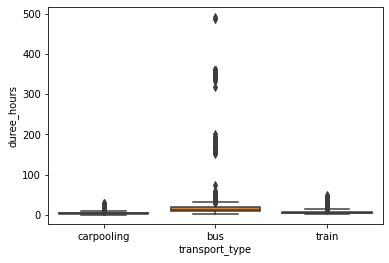

In [23]:
%matplotlib inline
merged['duree_hours'] = merged.duree.dt.components.hours + (merged.duree.dt.components.minutes / 60) + merged.duree.dt.components.days * 24
sns.boxplot(x='transport_type', y='duree_hours', data= merged)

Le graph confirme l'observation de tout à l'heure: il existe des entrées de données (voyage) très grandes et differentes par rapport aux autres. c'est des outliers. prenons soit de celà! 

Text(0.5, 1.0, 'différence de la durée selon le type du transport')

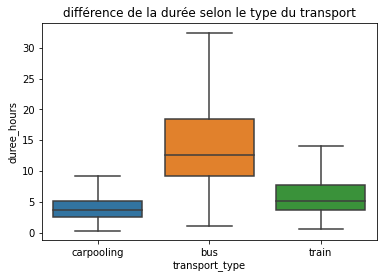

In [24]:
sns.boxplot(x='transport_type', y='duree_hours', data= merged,  showfliers = False)
plt.title('différence de la durée selon le type du transport')

Le resultat est prévisible: le bus prend le plus de temps, suivi par le train et puis le covoiturage.
Interessons nous maintenant au prix.

Text(0.5, 1.0, 'différence du prix selon le type du transport')

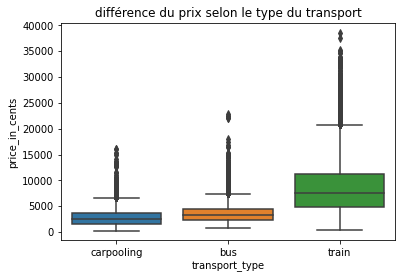

In [25]:
sns.boxplot(x='transport_type', y='price_in_cents', data= merged)
plt.title('différence du prix selon le type du transport')

Le train est le plus cher et la covoiturage est le moins cher ... tout semble correct!

###Maintenant selon la distance

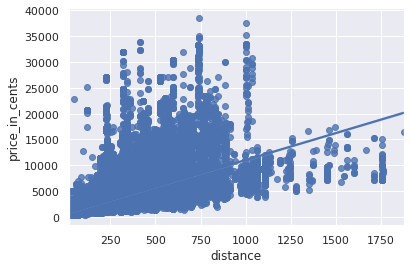

In [33]:
sns.set(color_codes=True)
sns.regplot(x='distance', y='price_in_cents', data=merged_d)

Le prix auguemente avec la distance. Resultat logique!

### Pour le fun, traçons une cartographie des stations étudiée en Europe

In [44]:
m = folium.Map([46.2276, 2.2137], zoom_start=5)
m

In [0]:
# mark each station as a point
for index, row in station.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['unique_name'],
                        fill_color="#3db7e4", #color
                       ).add_to(m)

In [0]:
# convert to (n, 2) nd-array format for heatmap
stationArr = station[['latitude', 'longitude']].to_numpy()

# plot heatmap
m.add_child(plugins.HeatMap(stationArr, radius=1))
m